In [1]:
from google.colab import files
uploaded = files.upload()


Saving loan.csv to loan.csv


In [2]:
# Step 1: Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Load Dataset
df = pd.read_csv("loan.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Step 3: Check for Nulls and Basic Info
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [4]:
# Step 4: Drop Columns That Are Not Useful
# (Customize this based on your specific dataset)
df_clean = df.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

# Step 5: Handle Missing Values (Simple fill)
df_clean = df_clean.fillna('Unknown')

# Step 6: Convert to Transaction Format (One-hot encode)
df_encoded = pd.get_dummies(df_clean)

df_encoded.head()


,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Unknown,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_Unknown,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_Unknown,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,False,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
1,False,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
2,False,True,False,False,False,True,True,False,False,False,...,False,True,False,True,False,False,False,True,False,True
3,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,False,True,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [5]:
# Step 7: Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)


,support,itemsets
9,0.814332,(Self_Employed_No)
1,0.796417,(Gender_Male)
7,0.781759,(Education_Graduate)
12,0.773616,(Credit_History_1.0)
17,0.687296,(Loan_Status_Y)
...,...,...
176,0.100977,"(Property_Area_Semiurban, Dependents_0, Marrie..."
377,0.100977,"(Self_Employed_No, Loan_Status_N, Education_Gr..."
437,0.100977,"(Loan_Status_Y, Gender_Male, Married_Yes, Cred..."
414,0.100977,"(Self_Employed_No, Credit_History_1.0, Loan_St..."


In [6]:
# Step 8: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.sort_values(by='confidence', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2617,"(Self_Employed_No, Loan_Status_Y, Property_Are...",(Gender_Male),0.127036,0.796417,0.122150,0.961538,1.207331,1.0,0.020976,5.293160,0.196716,0.152439,0.811077,0.557456
788,"(Credit_History_1.0, Dependents_2, Gender_Male)",(Married_Yes),0.122150,0.648208,0.117264,0.960000,1.481005,1.0,0.038085,8.794788,0.369975,0.179551,0.886296,0.570452
2848,"(Loan_Status_Y, Gender_Male, Dependents_0, Pro...",(Credit_History_1.0),0.117264,0.773616,0.112378,0.958333,1.238772,1.0,0.021661,5.433225,0.218354,0.144351,0.815947,0.551798
2092,"(Loan_Status_Y, Gender_Male, Dependents_0, Mar...",(Credit_History_1.0),0.112378,0.773616,0.107492,0.956522,1.236430,1.0,0.020555,5.206840,0.215430,0.138075,0.807945,0.547735
1029,"(Loan_Status_Y, Property_Area_Urban, Married_Yes)",(Gender_Male),0.149837,0.796417,0.143322,0.956522,1.201031,1.0,0.023990,4.682410,0.196883,0.178499,0.786435,0.568240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,(Self_Employed_No),"(Credit_History_1.0, Loan_Status_N, Gender_Male)",0.814332,0.122150,0.102606,0.126000,1.031520,1.0,0.003135,1.004405,0.164578,0.123047,0.004386,0.483000
2729,(Self_Employed_No),"(Gender_Male, Education_Graduate, Dependents_0...",0.814332,0.118893,0.102606,0.126000,1.059781,1.0,0.005788,1.008132,0.303815,0.123529,0.008067,0.494507
3470,(Self_Employed_No),"(Loan_Status_Y, Property_Area_Urban, Education...",0.814332,0.122150,0.102606,0.126000,1.031520,1.0,0.003135,1.004405,0.164578,0.123047,0.004386,0.483000
2132,(Self_Employed_No),"(Credit_History_1.0, Loan_Status_Y, Gender_Mal...",0.814332,0.123779,0.100977,0.124000,1.001789,1.0,0.000180,1.000253,0.009621,0.120623,0.000253,0.469895


In [7]:
# Optional: Filter Interesting Rules
rules[rules['confidence'] > 0.8]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(Gender_Female),(Education_Graduate),0.182410,0.781759,0.149837,0.821429,1.050744,1.0,0.007236,1.222150,0.059068,0.184000,0.181770,0.506548
7,(Married_Yes),(Gender_Male),0.648208,0.796417,0.581433,0.896985,1.126276,1.0,0.065189,1.976245,0.318705,0.673585,0.493990,0.813523
9,(Dependents_1),(Gender_Male),0.166124,0.796417,0.133550,0.803922,1.009423,1.0,0.001247,1.038274,0.011195,0.161100,0.036863,0.485805
10,(Dependents_2),(Gender_Male),0.164495,0.796417,0.149837,0.910891,1.143736,1.0,0.018830,2.284654,0.150415,0.184739,0.562297,0.549515
12,(Education_Not Graduate),(Gender_Male),0.218241,0.796417,0.184039,0.843284,1.058847,1.0,0.010228,1.299054,0.071091,0.221569,0.230209,0.537184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,"(Loan_Status_Y, Gender_Male, Married_Yes, Prop...",(Credit_History_1.0),0.112378,0.773616,0.105863,0.942029,1.217696,1.0,0.018926,3.905130,0.201411,0.135699,0.743927,0.539436
4789,"(Loan_Status_Y, Gender_Male, Married_Yes, Prop...",(Self_Employed_No),0.127036,0.814332,0.105863,0.833333,1.023333,1.0,0.002414,1.114007,0.026119,0.126706,0.102339,0.481667
4790,"(Loan_Status_Y, Gender_Male, Married_Yes, Prop...",(Education_Graduate),0.128664,0.781759,0.105863,0.822785,1.052479,1.0,0.005279,1.231503,0.057225,0.131579,0.187984,0.479101
4793,"(Loan_Status_Y, Married_Yes, Property_Area_Sem...",(Gender_Male),0.127036,0.796417,0.105863,0.833333,1.046353,1.0,0.004690,1.221498,0.050746,0.129482,0.181333,0.483129


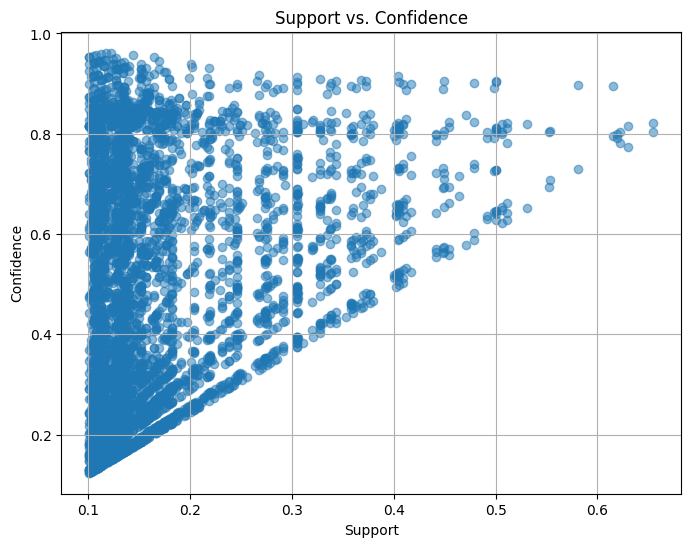

In [9]:
import matplotlib.pyplot as plt

def plot_scatter_support_confidence(rules):
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs. Confidence')
    plt.grid(True)
    plt.show()

plot_scatter_support_confidence(rules)


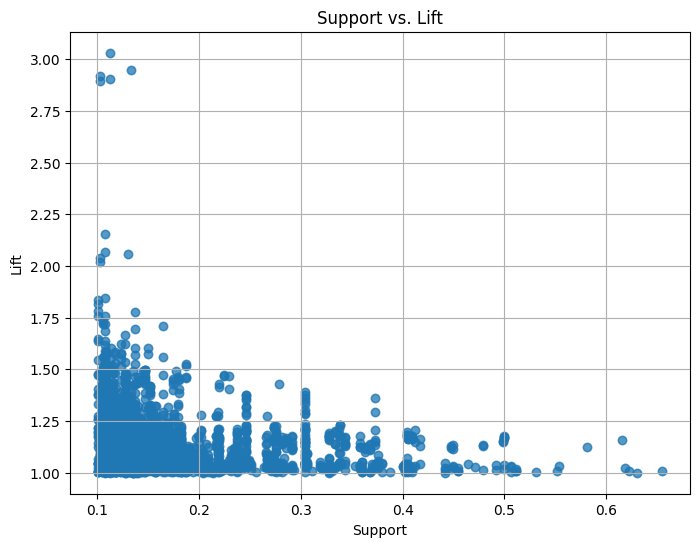

In [10]:
def plot_scatter_support_lift(rules):
    plt.figure(figsize=(8, 6))
    plt.scatter(rules['support'], rules['lift'], alpha=0.5)
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Support vs. Lift')
    plt.grid(True)
    plt.show()

plot_scatter_support_lift(rules)
